In [2]:
#Data Set From University of California, Irvine - Machine Learning Repository(Center for Machine Learning & Intelligent Systems)
#https://archive.ics.uci.edu/ml/datasets/Student+Performance
#Students Performance Data Set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#The data set includes 32 features for prediction of grades
st_maths = pd.read_csv('student-mat.csv', sep=';')
st_maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
st_maths.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
categorical_variables = st_maths.dtypes.loc[st_maths.dtypes=='object'].index
print categorical_variables

Index([u'school', u'sex', u'address', u'famsize', u'Pstatus', u'Mjob', u'Fjob',
       u'reason', u'guardian', u'schoolsup', u'famsup', u'paid', u'activities',
       u'nursery', u'higher', u'internet', u'romantic'],
      dtype='object')


In [7]:
st_maths[categorical_variables].apply(lambda x:len(x.unique()))

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [8]:
st_maths['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [9]:
st_maths['Mjob'].value_counts()/st_maths.shape[0]

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64

In [10]:
st_maths['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [11]:
st_maths['Fjob'].value_counts()/st_maths.shape[0]

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64

In [12]:
st_maths['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [13]:
#print the cross-tabulation
ct = pd.crosstab(st_maths['sex'],st_maths['G3'], margins = True)
print ct

G3    0  4  5   6  7   8   9  10  11  12  13  14  15  16  17  18  19  20  All
sex                                                                          
F    23  1  3  13  4  14  17  30  29  11  17  14  16   6   3   5   2   0  208
M    15  0  4   2  5  18  11  26  18  20  14  13  17  10   3   7   3   1  187
All  38  1  7  15  9  32  28  56  47  31  31  27  33  16   6  12   5   1  395


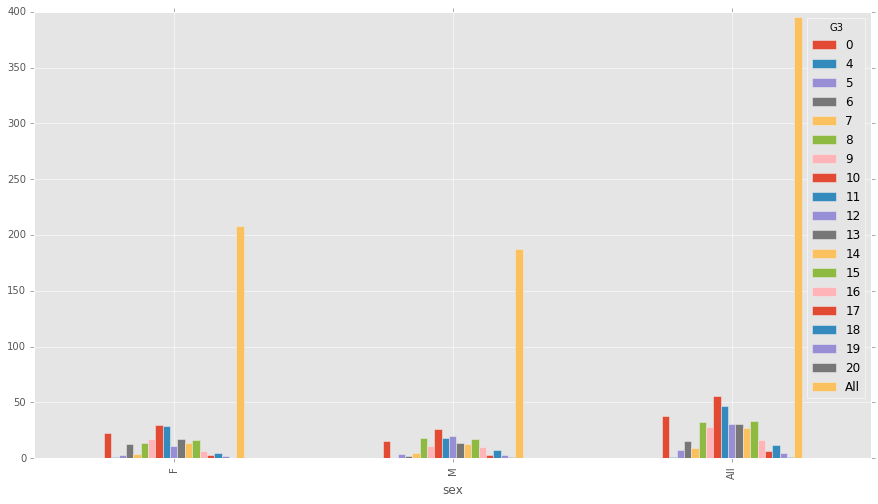

In [14]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
ct.plot(kind='bar',figsize=(15,8))

In [15]:
#Checking the missing value in the data set:
st_maths.apply(lambda x: sum(x.isnull()))

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [22]:
pd.pivot_table(st_maths, index=['internet'], values=['G3'],aggfunc=np.mean)

,G3
internet,
no,9.409091
yes,10.617021


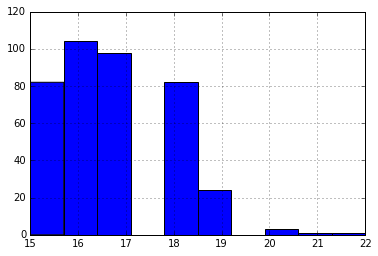

In [20]:
#Age distribution of students 
st_maths['age'].hist()

In [17]:
ct2 = pd.crosstab(st_maths['health'],st_maths['G3'], margins = True)
print ct2

G3       0  4  5   6  7   8   9  10  11  12  13  14  15  16  17  18  19  20  \
health                                                                        
1        2  1  1   1  0   4   1   7   5   1   5   4   8   1   2   2   2   0   
2        7  0  0   3  0   2   3   8   2   2   4   6   2   2   0   2   1   1   
3        8  0  2   3  3   8   7  16  13  11   4   5   4   4   1   1   1   0   
4        8  0  1   1  3   5   6  11   7   3   5   5   3   3   1   3   1   0   
5       13  0  3   7  3  13  11  14  20  14  13   7  16   6   2   4   0   0   
All     38  1  7  15  9  32  28  56  47  31  31  27  33  16   6  12   5   1   

G3      All  
health       
1        47  
2        45  
3        91  
4        66  
5       146  
All     395  


In [43]:
st_maths['internet'].head()

0     no
1    yes
2    yes
3    yes
4     no
Name: internet, dtype: object

In [16]:
#Replaying string values into numeric binary values
st_maths['internet'].replace(['yes','no'],[1,0]).head()

0    0
1    1
2    1
3    1
4    0
Name: internet, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = st_maths.iloc[0:33]
Y = st_maths.iloc[:,-1]
#Feature Selection
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
#summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])